In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append("../..")

from utils_common import EvalData

In [27]:
import os
os.getcwd()

'/home/spark-agent/Dropbox (MIT)/HandsOn/pose-baselines/fpfh_teaser/inspection'

## Extracting Test Data

In [28]:
labels = ["shapenet.sim.easy", "shapenet.sim.medium", "shapenet.sim.hard",
          "shapenet.real.easy", "shapenet.real.medium", "shapenet.real.hard"]

files = []
# evaluated on: shapenet.sim.easy  
files.append("../runs/Dec04_18-46-10_spark-agent/eval_data.pkl")

# evaluated on: shapenet.sim.medium  
files.append("../runs/Dec04_18-48-15_spark-agent/eval_data.pkl")

# evaluated on: shapenet.sim.hard 
files.append("../runs/Dec04_18-49-20_spark-agent/eval_data.pkl")

# evaluated on: shapenet.real.easy  
files.append("../runs/Dec04_18-50-22_spark-agent/eval_data.pkl")

# evaluated on: shapenet.real.medium  
files.append("../runs/Dec04_18-51-33_spark-agent/eval_data.pkl")

# evaluated on: shapenet.real.hard 
files.append("../runs/Dec04_18-52-43_spark-agent/eval_data.pkl")


In [29]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData() 
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
    eval_data.complete_eval_data()
    
    data[label] = eval_data.data

label:  shapenet.sim.easy
loading file:  ../runs/Dec04_18-46-10_spark-agent/eval_data.pkl
label:  shapenet.sim.medium
loading file:  ../runs/Dec04_18-48-15_spark-agent/eval_data.pkl
label:  shapenet.sim.hard
loading file:  ../runs/Dec04_18-49-20_spark-agent/eval_data.pkl
label:  shapenet.real.easy
loading file:  ../runs/Dec04_18-50-22_spark-agent/eval_data.pkl
label:  shapenet.real.medium
loading file:  ../runs/Dec04_18-51-33_spark-agent/eval_data.pkl
label:  shapenet.real.hard
loading file:  ../runs/Dec04_18-52-43_spark-agent/eval_data.pkl


## ADD-S and ADD-S (AUC)

In [30]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

,shapenet.sim.easy,shapenet.sim.medium,shapenet.sim.hard,shapenet.real.easy,shapenet.real.medium,shapenet.real.hard
adds_th_score,0.953125,0.664062,0.501953,0.035156,0.011719,0.015625
adds_auc,0.848572,0.632011,0.510470,0.135067,0.096712,0.079080


## Distribution of Error Metrics

In [31]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [32]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

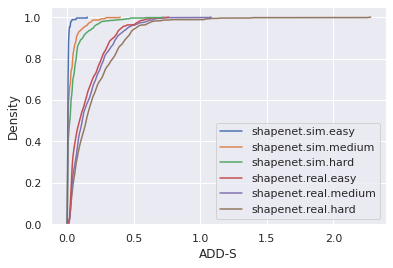

In [33]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('ADD-S')

In [34]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_


In [35]:
conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

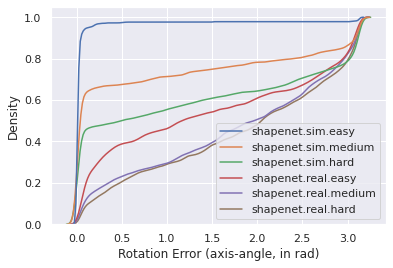

In [36]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

In [37]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_


In [38]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

Text(0.5, 0, 'Translation Error')

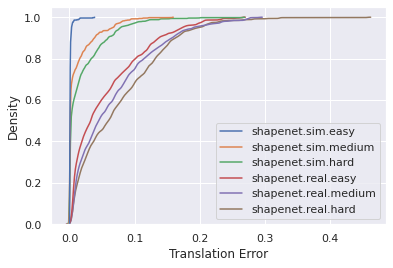

In [39]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')